<a href="https://colab.research.google.com/github/AgunsBaba/Assignment/blob/master/ClassificationTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
#import modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [131]:
#import data
df = pd.read_csv('/content/cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [132]:
#check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [133]:
#check class distribution
df['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [134]:
#give classes numerical values
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

In [135]:
#create features and label
y = df['diagnosis']
X = df.drop(columns= ['diagnosis', 'id'])

In [136]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
#instantiate models
dec_tree = DecisionTreeClassifier(random_state=42)
bag = BaggingClassifier(random_state=42)
rand_tree = RandomForestClassifier(random_state=42)

In [138]:
#check models parameters that can be tuned
print(dec_tree.get_params(),)
print(bag.get_params(),)
print(rand_tree.get_params(),)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
{'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [139]:
#create a function to fit and score the models
def accuracy_result(model_name):
  model_name.fit(X_train, y_train)
  test_score = model_name.score(X_test, y_test)
  print(test_score)



In [140]:
#print models accuracy scores
model_tuple = (dec_tree, bag, rand_tree)
for i in model_tuple:
  accuracy_result(model_name = i)
  


0.9415204678362573
0.9532163742690059
0.9707602339181286


In [141]:
#Trying to improve decision tree accuracy by tuning the max_depth

#find optimal max_depth for the decision tree classifier by trying a range from 2 to 7 trees
max_depth_range = list(range(2, 7))
accuracy_list = []
for depth in max_depth_range:
    dec_tree_eval = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    dec_tree_eval.fit(X_train, y_train)
    score = dec_tree_eval.score(X_test, y_test)
    accuracy_list.append(score)

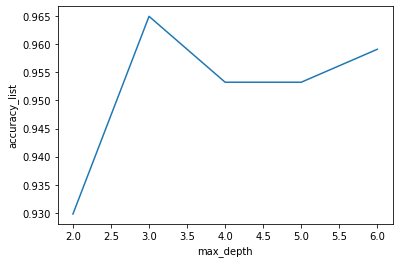

In [142]:
# Visualize which max_depth leads to the highest accuracy score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, accuracy_list)
plt.xlabel('max_depth')
plt.ylabel('accuracy_list');

For the decision tree classifier, best accuracy score seems to be when max_depth = 3

In [143]:
#Trying to improve the bagging classifier accuracy by tuning the n_estimators

#find optimal n_estimators by trying a range from 2 to 20 estimators
n_estimators_range = list(range(2, 20))
bag_score = []
for est in n_estimators_range:
  bag_eval = BaggingClassifier(n_estimators = est, 
                               random_state=42)
  bag_eval.fit(X_train, y_train)
  b_score = bag_eval.score(X_test, y_test)
  bag_score.append(b_score)



Text(0, 0.5, 'score')

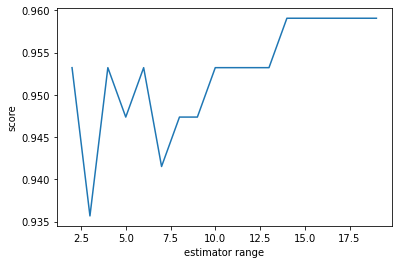

In [144]:
#visualize which n_estimators leads to the highest accuracy score
plt.plot(n_estimators_range, bag_score)
plt.xlabel('estimator range')
plt.ylabel('score')

For Bagging classifier, it seems the highest accuracy is obtained when n_estimators = 14

In [145]:
#Trying to improve the random forest classifier accuracy by tuning the n_estimators

#find optimal depth for the random forest classifier by trying a range from 2 to 100 trees
est_range_max = list(range(2, 100)) 
rand_list = []
for numb in est_range_max:
    rand_tree_eval = RandomForestClassifier(n_estimators= numb, 
                             random_state = 42)
    rand_tree_eval.fit(X_train, y_train)
    rand_score = rand_tree_eval.score(X_test, y_test)
    rand_list.append(rand_score)

Text(0, 0.5, 'score')

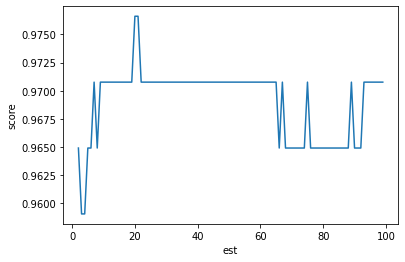

In [146]:
plt.plot(est_range_max, rand_list)
plt.xlabel('est')
plt.ylabel('score')

For Random forest classifier, it seems the best accuracy is when n_estimators = 20

In [147]:
#Plugging in the best hyperparameter values in the models
dec_tree_best = DecisionTreeClassifier(max_depth=3, random_state=42)
bag_best = BaggingClassifier(n_estimators=14, random_state=42)
rand_tree_best = RandomForestClassifier(n_estimators=21, random_state=42)


In [148]:
def get_best_accuracy(models):
  models.fit(X_train, y_train)
  score_best = models.score(X_test, y_test)
  print(score_best)


In [149]:
best_tuple = (dec_tree_best, bag_best, rand_tree_best)
for i in best_tuple:
  get_best_accuracy(i)

0.9649122807017544
0.9590643274853801
0.9766081871345029


Result above indicates tuned models have accuracy better than the original models